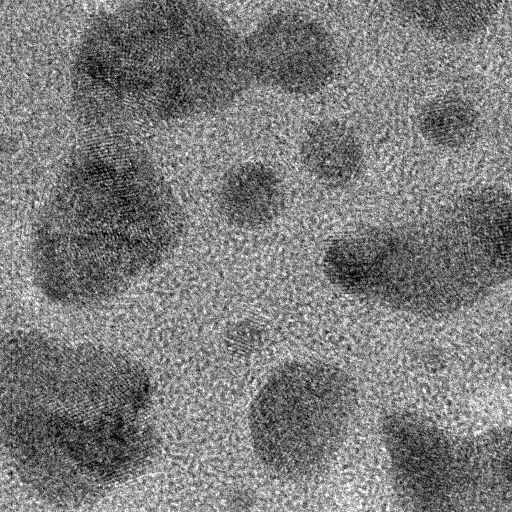

In [19]:
from PIL import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
short_image = Image.open(r'short exposure.tif')
#img_PIL.show()
display(short_image)
a = np.array(short_image)


# Median filter

In [20]:
def median(image, kernel_size):
    temp = []
    indicator = kernel_size // 2
    data_final = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for z in range(kernel_size):
                if i + z - indicator < 0 or i + z - indicator > len(image) - 1:
                    for c in range(kernel_size):
                        temp.append(0)
                elif j + z - indicator < 0 or j + indicator > len(image[0]) - 1:
                    temp.append(0)
                else:
                    for k in range(kernel_size):
                        temp.append(image[i + z - indicator][j + k - indicator])

#            temp.sort()
#            data_final[i][j] = temp[len(temp) // 2]
            #print(temp)
            data_final[i][j] = np.median (temp)
            temp = []
    return data_final

Text(0.5, 1.0, 'filtered image with median filter of size 5')

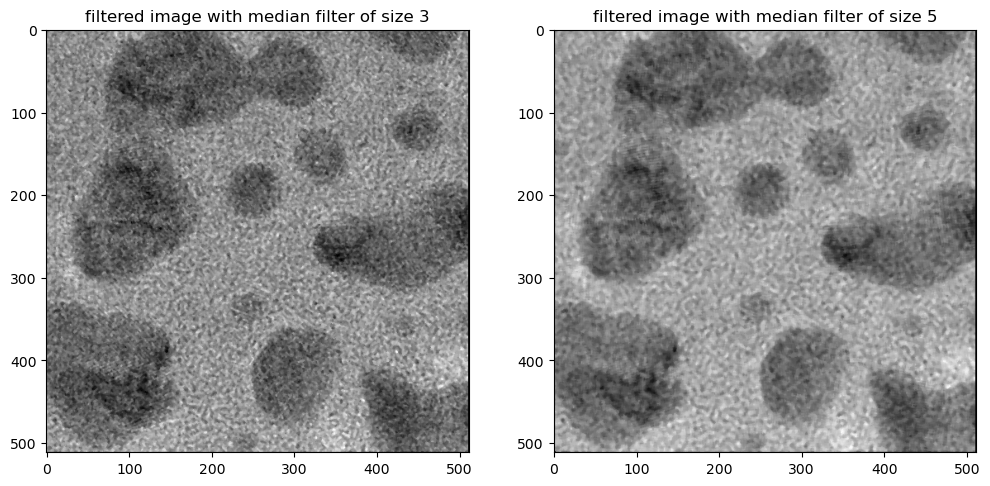

In [21]:
img = Image.open(r'short exposure.tif').convert("L")
arr = np.array(img)

median3 = median(arr, 3)
median5 = median(arr, 5) 

img = Image.fromarray(median3)
#img.show()
plt.figure (figsize = (12,8))
plt.subplot(121)
plt.imshow(median3,cmap='gray')
plt.title("filtered image with median filter of size 3")
plt.subplot(122)
plt.imshow(median5,cmap='gray')
plt.title("filtered image with median filter of size 5")

In [22]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

# Final one:

In [23]:
def median_filter(image, filter_size):
    #dummy variable to add the values that are corresponding to the kernel
    dummy = []
    limit = filter_size // 2
    filtered_image = np.zeros_like(image)
    #Initializing kernal depending on the filter size
    kernal = [
        [i, j]
        for i in range(-limit, filter_size-limit)
        for j in range(-limit, filter_size-limit)]
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):  
            for m, n in kernal: 
                #I will not use the padding technique but instead I will assign out of bounds values to zeros.
                if (i+m < 0) or (j+n < 0) or (len(image) <= i+m) or (len(image[0]) <= j+n):
                    dummy.append(0)
                else: 
                    dummy.append(image[i+m][j+n])
            
            filtered_image[i][j] = np.median(dummy)
            dummy = []
                
    return filtered_image

Text(0.5, 1.0, 'filtered image with median filter of size 5')

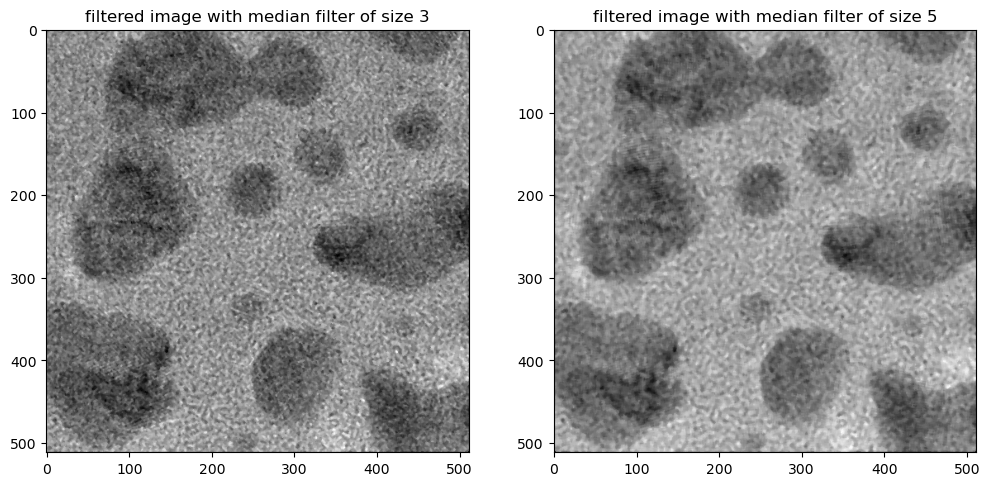

In [24]:
img = Image.open(r'short exposure.tif').convert("L")
arr = np.array(img)
median3 = median_filter(arr, 3)
median5 = median_filter(arr, 5) 

plt.figure (figsize = (12,8))
plt.subplot(121)
plt.imshow(median3,cmap='gray')
plt.title("filtered image with median filter of size 3")
plt.subplot(122)
plt.imshow(median5,cmap='gray')
plt.title("filtered image with median filter of size 5")

# Comparison with built-in function

In [25]:
import cv2
img = cv2.imread('short exposure.tif')
img = np.array(img)
median33 = cv2.cvtColor(cv2.medianBlur(img, 3),cv2.COLOR_BGR2GRAY)
median55 = cv2.cvtColor(cv2.medianBlur(img, 5), cv2.COLOR_BGR2GRAY)
#img = Image.fromarray(median)
#display(img)
#img.show()


In [26]:
(median3 - median33)[2:510,2:510]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Fourier transform

Text(0.5, 1.0, 'Magnitude spectrum for 5 median filtered image')

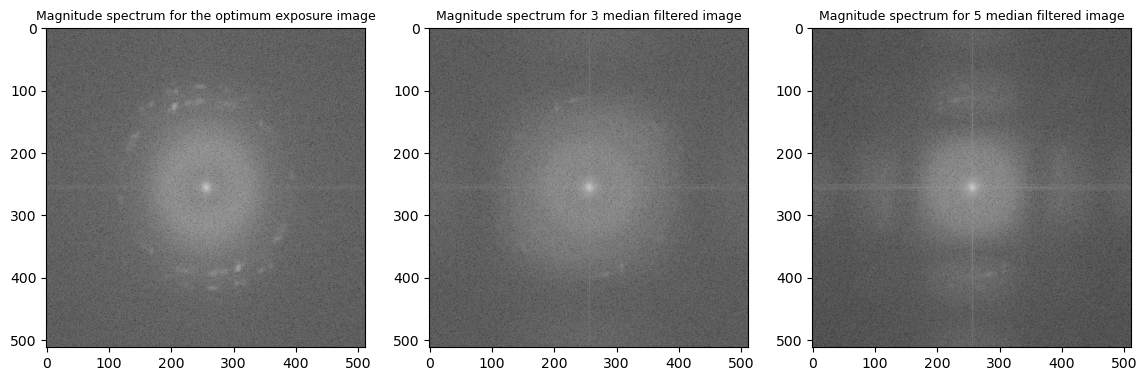

In [27]:
#Reading the image of the optimum exposure
long_image = Image.open(r'long exposure.tif')

#Find fft of different images 
long_image_fourier = np.fft.fftshift(np.fft.fft2(long_image))
median3_fourier = np.fft.fftshift(np.fft.fft2(median3))
median5_fourier = np.fft.fftshift(np.fft.fft2(median5))

#Show the corresponding images 
plt.figure(figsize=(14,8))
plt.subplot(131)
plt.imshow(np.log(abs(long_image_fourier)), cmap='gray');
plt.title('Magnitude spectrum for the optimum exposure image', fontsize = 9)
plt.subplot(132)
plt.imshow(np.log(abs(median3_fourier)), cmap='gray');
plt.title('Magnitude spectrum for 3 median filtered image',fontsize = 9)
plt.subplot(133)
plt.imshow(np.log(abs(median5_fourier)), cmap='gray');
plt.title('Magnitude spectrum for 5 median filtered image',fontsize = 9)

# Display three of the images: long, 3 median, and 5 median

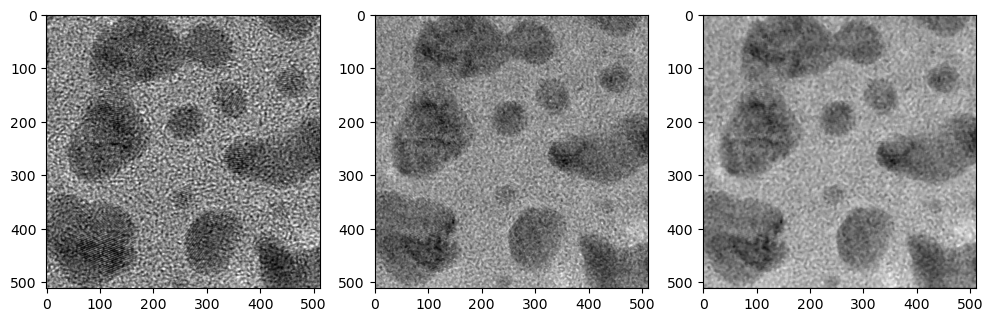

In [28]:
plt.figure(figsize = (12,8))

plt.subplot(131)
plt.imshow(long_image)
plt.subplot(132)
plt.imshow(median3,cmap='gray')
plt.subplot(133)
plt.imshow(median5,cmap='gray')

# Display three of the images: short, 3 median, and 5 median

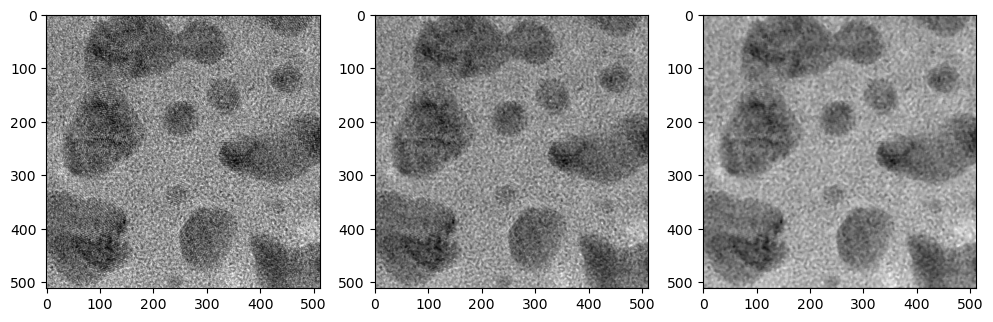

In [29]:
plt.figure(figsize = (12,8))

plt.subplot(131)
plt.imshow(short_image)
plt.subplot(132)
plt.imshow(median3,cmap='gray')
plt.subplot(133)
plt.imshow(median5,cmap='gray')

# fourier tranform of short, 3 median, and 5 median

Text(0.5, 1.0, 'Magnitude spectrum for 5 median filtered image')

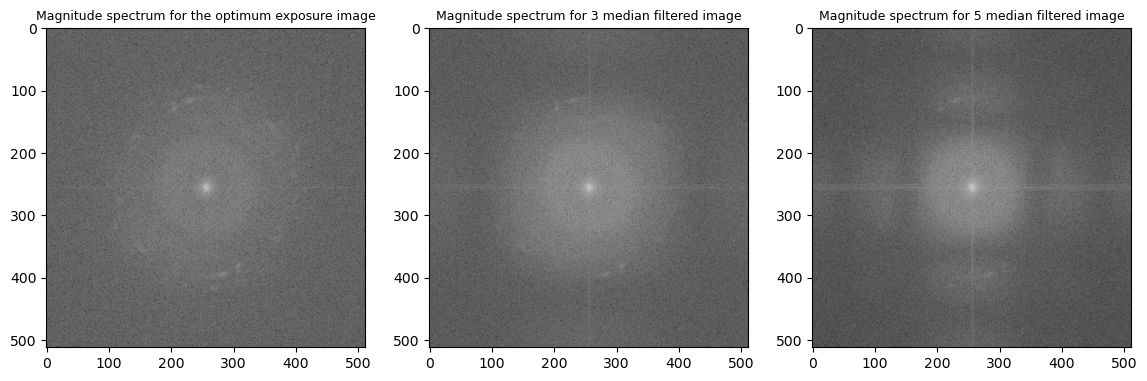

In [30]:
#Find fft of different images 
short_image_fourier = np.fft.fftshift(np.fft.fft2(short_image))
median3_fourier = np.fft.fftshift(np.fft.fft2(median3))
median5_fourier = np.fft.fftshift(np.fft.fft2(median5))

#Show the corresponding images 
plt.figure(figsize=(14,8))
plt.subplot(131)
plt.imshow(np.log(abs(short_image_fourier)), cmap='gray');
plt.title('Magnitude spectrum for the optimum exposure image', fontsize = 9)
plt.subplot(132)
plt.imshow(np.log(abs(median3_fourier)), cmap='gray');
plt.title('Magnitude spectrum for 3 median filtered image',fontsize = 9)
plt.subplot(133)
plt.imshow(np.log(abs(median5_fourier)), cmap='gray');
plt.title('Magnitude spectrum for 5 median filtered image',fontsize = 9)

# Try an image with larger median filter

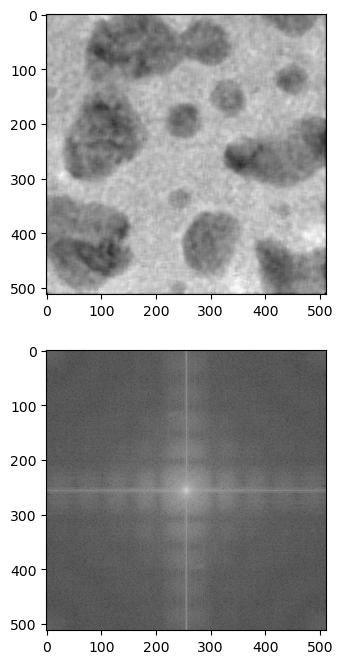

In [32]:
median19 = median_filter(arr, 10) 
median19_fourier = np.fft.fftshift(np.fft.fft2(median19))

plt.figure (figsize = (12,8))
plt.subplot(211)
plt.imshow(median19, cmap ='gray')
plt.subplot(212)
plt.imshow(np.log(abs(median19_fourier)), cmap ='gray')